# Курсовой проект по машинному обучению
# Анализ клиентской оттока и разработка стратегии удержания клиентов
## Использование данных о клиентах X-банка для анализа оттока и разработки стратегии удержания.


#    Описание данных.

Признаки:
    

*    RowNumber — индекс строки в данных

*    CustomerId — уникальный идентификатор клиента

*    Surname — фамилия

*    CreditScore — кредитный рейтинг

*    Geography — страна проживания

*    Gender — пол

*    Age — возраст

*    Tenure — количество недвижимости у клиента

*    Balance — баланс на счёте

*    NumOfProducts — количество продуктов банка, используемых клиентом

*    HasCrCard — наличие кредитной карты

*    IsActiveMember — активность клиента

*    EstimatedSalary — предполагаемая зарплата

Целевой признак:

*   Exited — факт ухода клиента из банка

### Импортирование библиотек

In [67]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

# Импорт OneHotEncoder и OrdinalEncoder для работы с категориальными признаками
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder  

# Импорт функции train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импорт StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler  

# Импорт LogisticRegression (lr) для использования логистической регрессии
from sklearn.linear_model import LogisticRegression as lr  

# Импорт DecisionTreeClassifier (dtc) для использования классификатора дерева решений
from sklearn.tree import DecisionTreeClassifier as dtc  

# Импорт RandomForestClassifier (rfc) для использования классификатора случайного леса
from sklearn.ensemble import RandomForestClassifier as rfc  

# Импорт GridSearchCV (gscv) для выполнения поиска по сетке параметров
from sklearn.model_selection import GridSearchCV as gscv  

# Импорт classification_report для вывода отчета о классификации
from sklearn.metrics import classification_report  

# Импорт f1_score для вычисления F1-меры, метрики, объединяющей точность и полноту
from sklearn.metrics import f1_score  

# Импорт roc_auc_score для вычисления площади под ROC-кривой (AUC-ROC)
from sklearn.metrics import roc_auc_score


### Предварительная обработка данных

In [68]:
import sklearn

print('Версия scikit-learn -', sklearn.__version__)



Версия scikit-learn - 1.3.2


In [69]:
# загрузим данные из пакета dataset
df = pd.read_csv('dataset/Churn_Modelling.csv') 

 # выведем на экран первые строки нашего datasetа
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
# посмотрим основные статистические характеристики числовых данных с помощью метода discribe()
df.describe() 


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [71]:
# Приведём столбцы к нижнему регистру
df.columns = df.columns.str.lower()
# можно посмотреть общую информацию с помощью метода info()
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


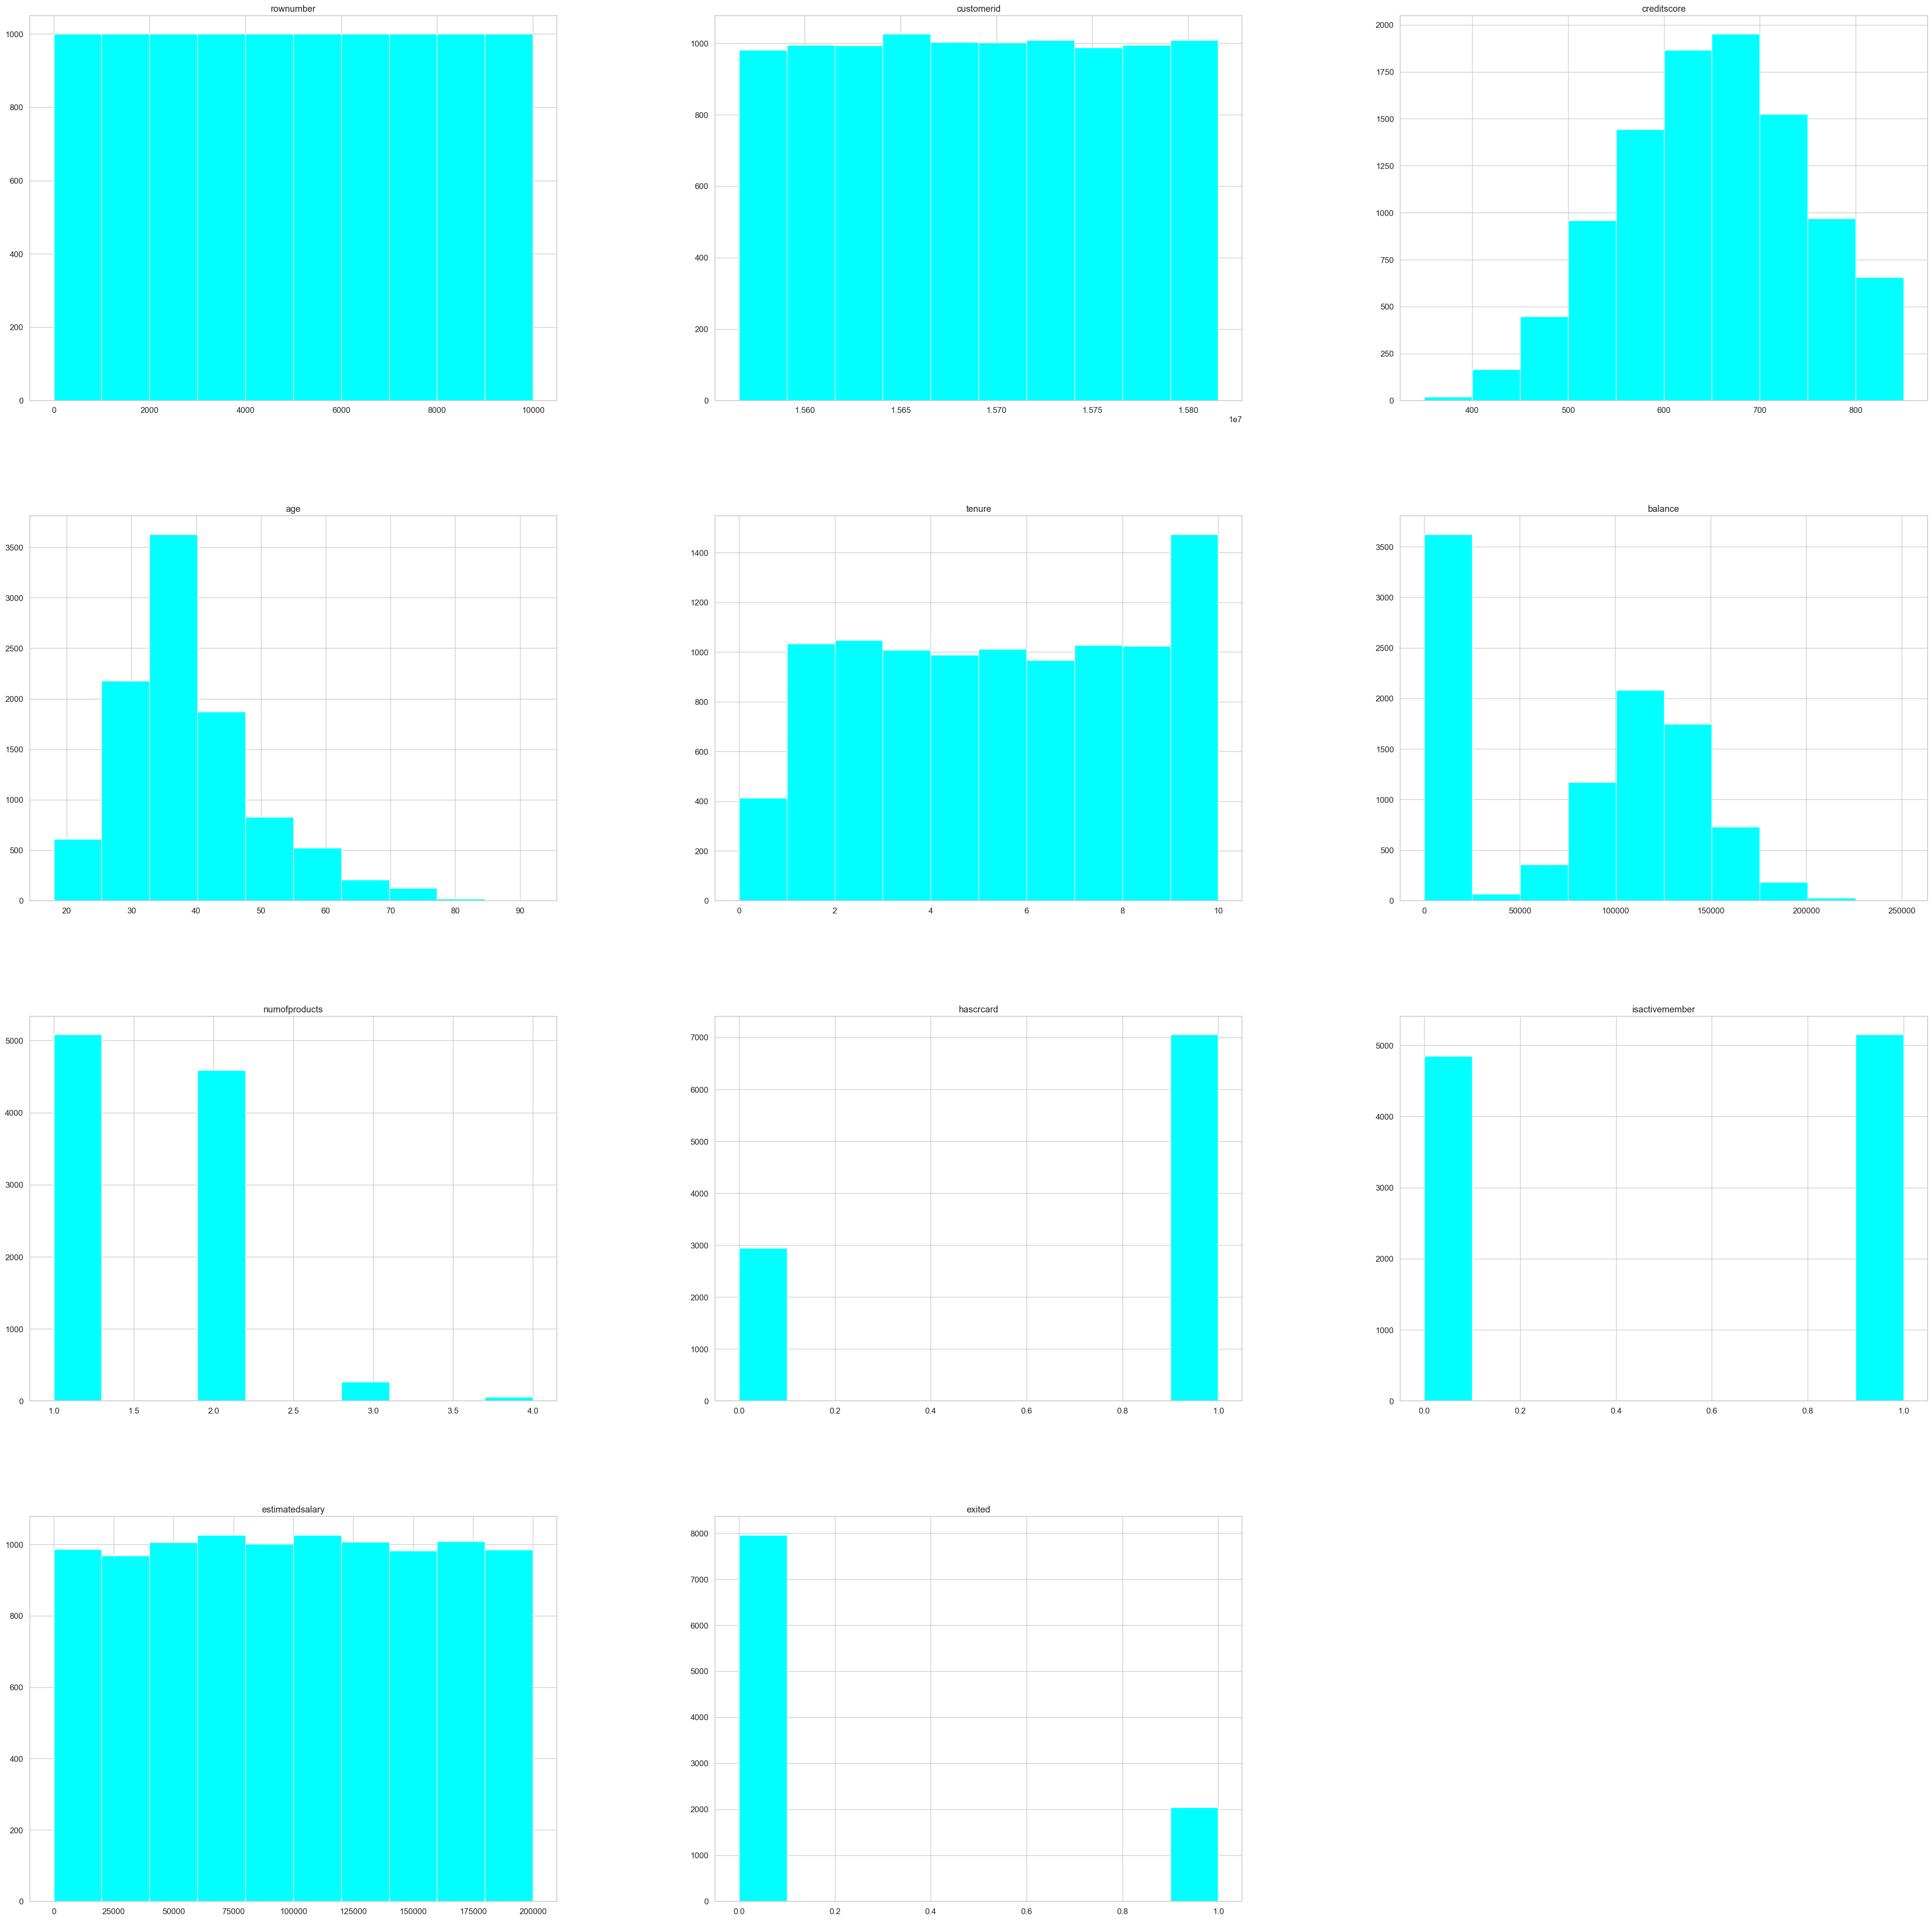

In [72]:
# Построим общую гисnограмму для всех столбцов таблицы
df.hist(figsize=(50,50),color='cyan') 
plt.show()

In [73]:
# проверим наличие явных дубликатов
df.duplicated().sum() 


0

In [74]:
df['geography'].value_counts()

geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [75]:
# подсчет уникальных значений в столбце 'age'
df['age'].value_counts()

age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

In [76]:
# Проверим наличие неявных дубликатов в столбцах с типом object: Surname, Age,  Geography.

df['surname'].value_counts().head(50)

surname
Smith          32
Scott          29
Martin         29
Walker         28
Brown          26
Yeh            25
Shih           25
Genovese       25
Maclean        24
Wright         24
Wilson         23
White          23
Ma             23
Fanucci        23
Wang           22
Johnson        22
Moore          22
Chu            22
Lu             22
Thompson       21
Mai            21
McGregor       21
Sun            21
Kao            20
Fang           20
Watson         20
Kennedy        20
Hughes         20
Jamieson       20
Young          20
Lo             20
Graham         20
Trevisani      20
Miller         20
Palerma        20
Shen           20
Mitchell       20
Kerr           20
Tuan           19
McKay          19
Wallace        19
Anderson       19
Bergamaschi    19
Ts'ui          19
Pan            19
Crawford       19
H?             19
Pai            19
Wei            19
Gordon         19
Name: count, dtype: int64

In [77]:
# В датасете неявные дубликаты не выявлены.

In [78]:
# Посмотрим в каких столбцах, сколько пропущенных значений
df.isna().sum() 

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [79]:
# Вычисляем среднюю долю пропущенных значений в каждом столбце
df.isna().mean()

rownumber          0.0
customerid         0.0
surname            0.0
creditscore        0.0
geography          0.0
gender             0.0
age                0.0
tenure             0.0
balance            0.0
numofproducts      0.0
hascrcard          0.0
isactivemember     0.0
estimatedsalary    0.0
exited             0.0
dtype: float64

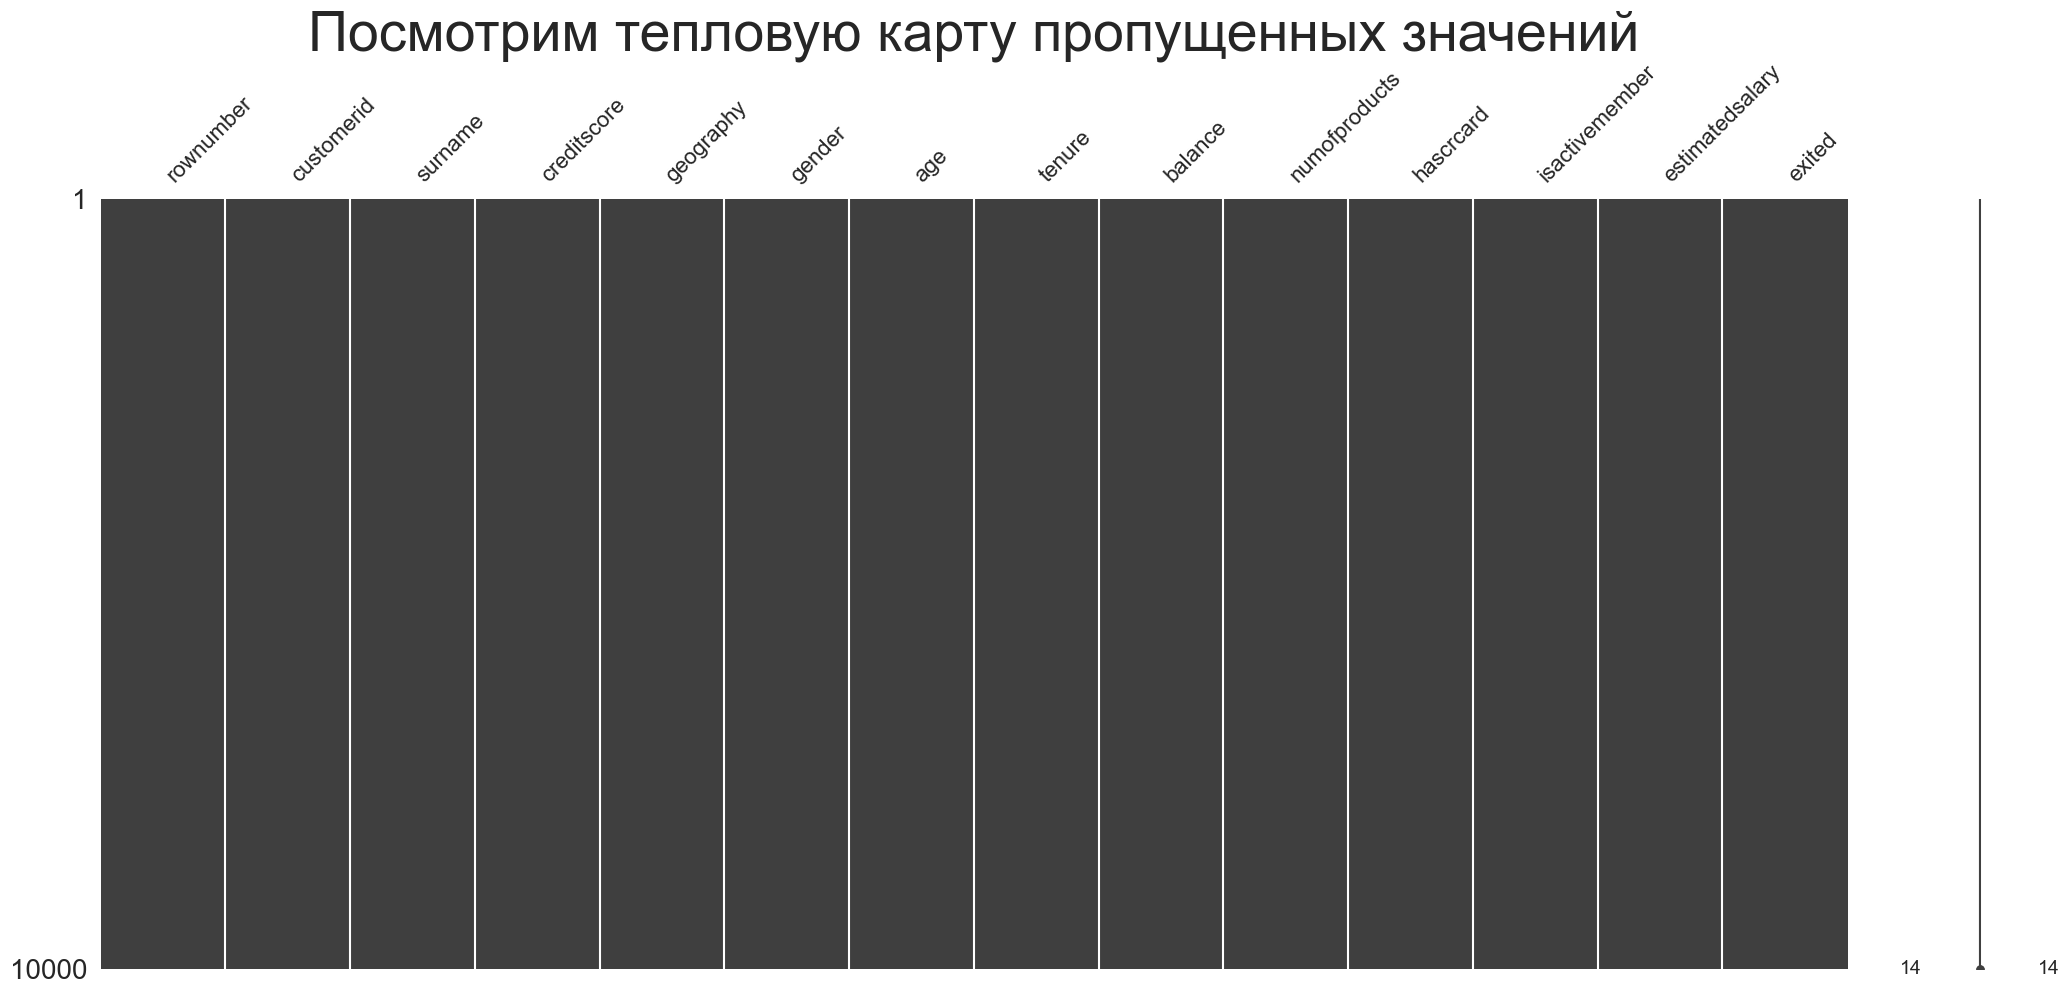

In [80]:
import missingno as miss
miss.matrix(df).set_title('Посмотрим тепловую карту пропущенных значений', fontsize=40)
plt.show()

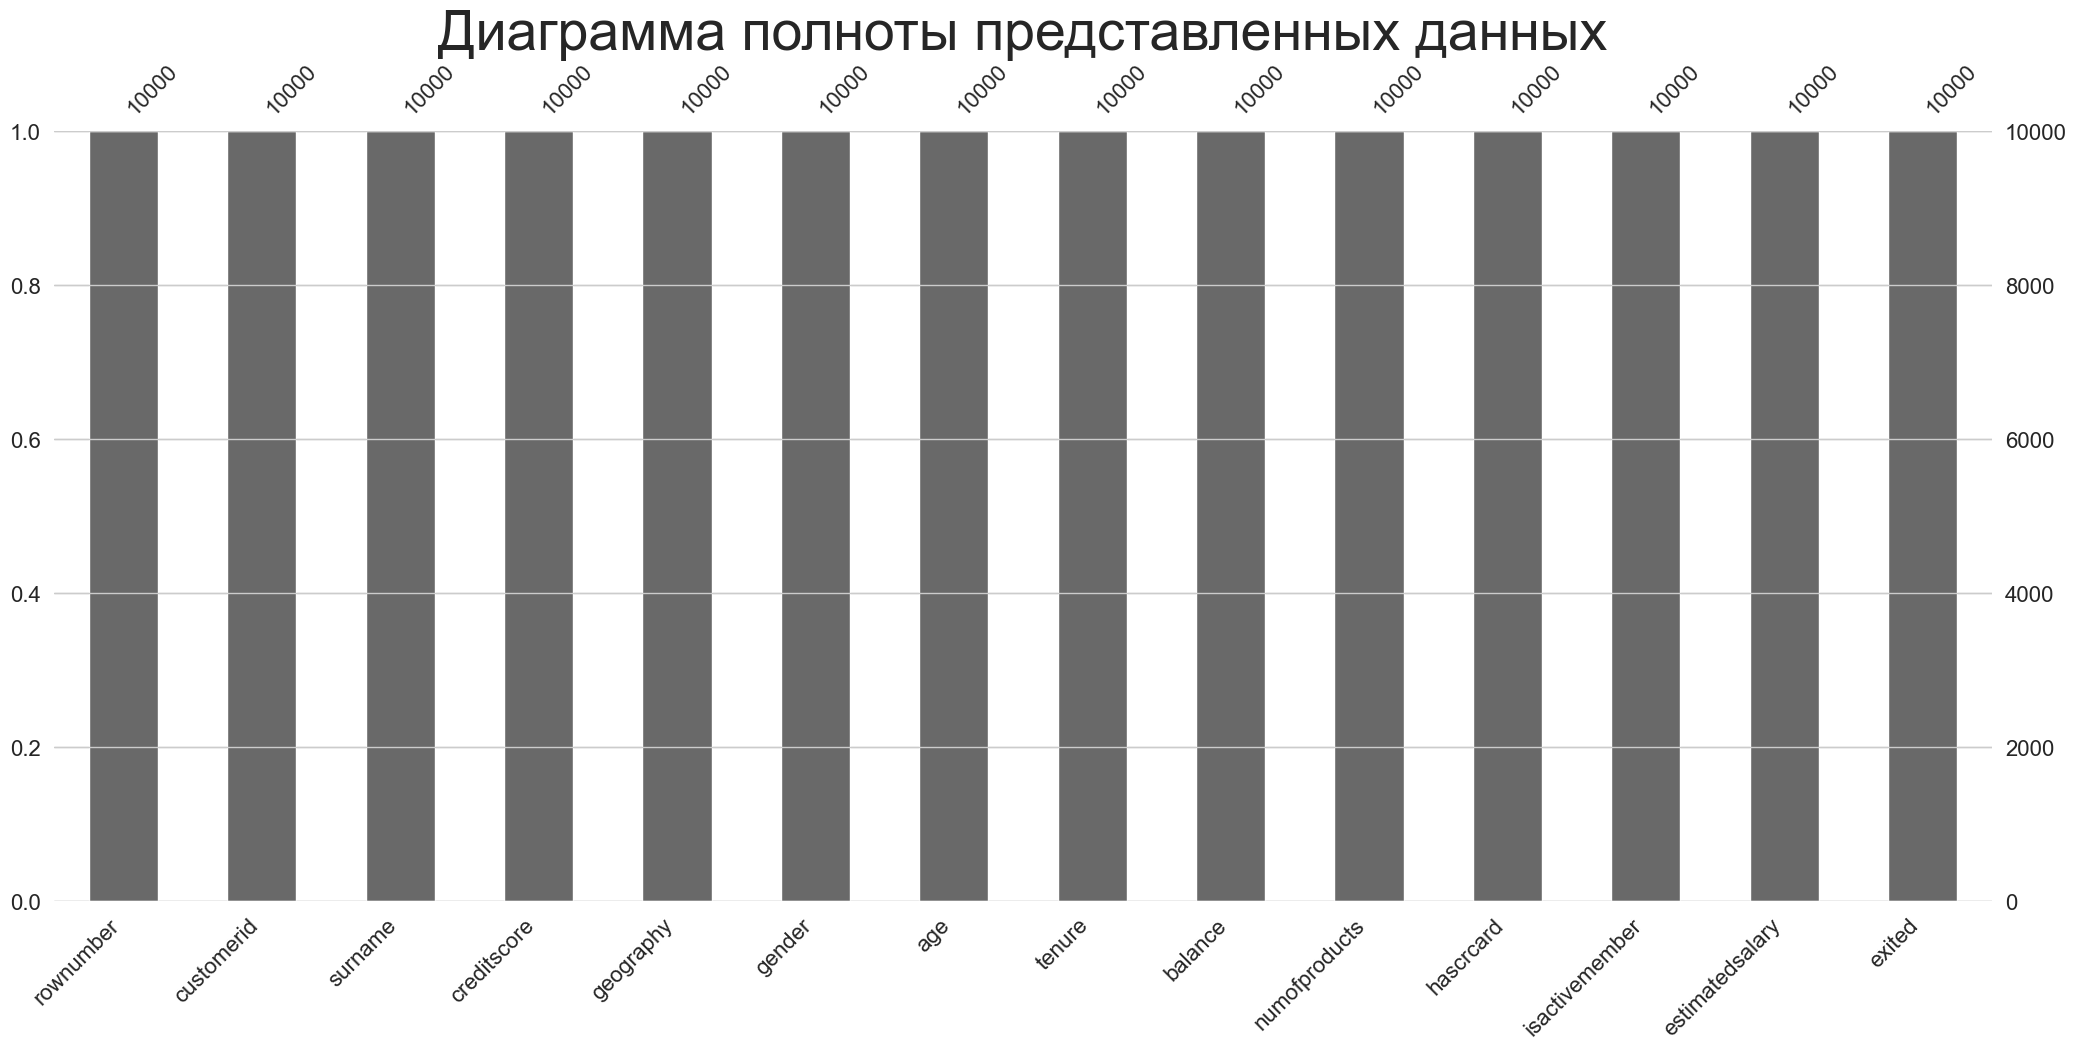

In [81]:
miss.bar(df)
plt.title('Диаграмма полноты представленных данных', fontsize=40)
plt.show()

In [82]:
# столбец creditscore
df['creditscore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: creditscore, dtype: float64

In [83]:
df['creditscore'].value_counts().head(20)

creditscore
850    233
678     63
655     54
705     53
667     53
684     52
670     50
651     50
683     48
652     48
648     48
660     48
682     47
663     47
640     47
637     46
714     45
686     45
710     45
645     45
Name: count, dtype: int64

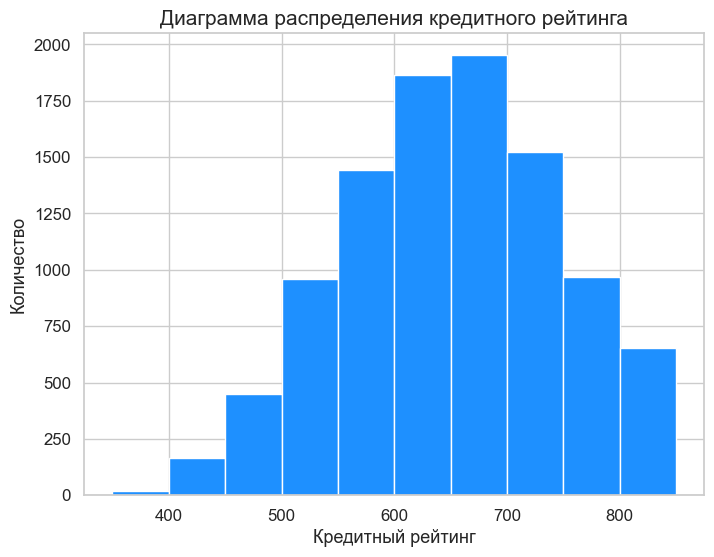

In [84]:
col = df['creditscore']
sns.set(style='whitegrid', font_scale=1.1)
col.hist( bins=10,figsize=(8,6),color='dodgerblue')
plt.title ('Диаграмма распределения кредитного рейтинга', fontsize=15)
plt.xlabel('Кредитный рейтинг', fontsize=13)
plt.ylabel('Количество', fontsize=13)
plt.xticks(rotation=360)
plt.show ()

In [85]:
# столбец Age
df['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

In [86]:
df['age'].value_counts().head(20)

age
37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
41    366
29    348
30    327
42    321
43    297
28    273
44    257
45    229
46    226
27    209
Name: count, dtype: int64

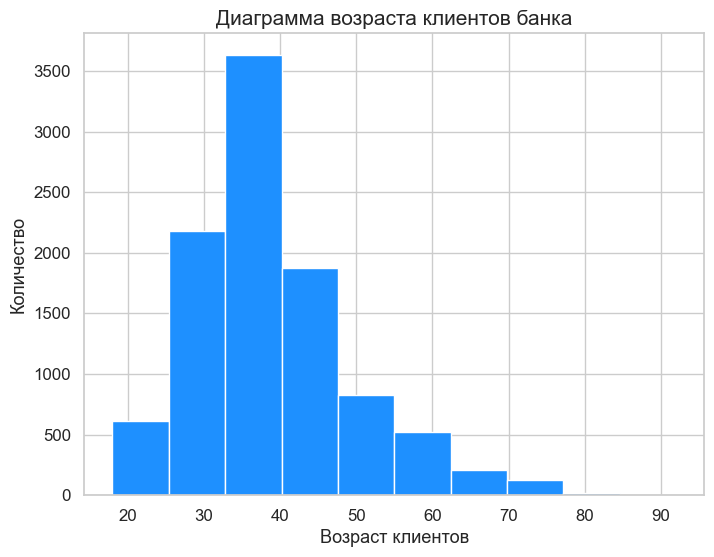

In [87]:
col = df['age']
sns.set(style='whitegrid', font_scale=1.1)
col.hist( bins=10,figsize=(8,6),color='dodgerblue')
plt.title ('Диаграмма возраста клиентов банка', fontsize=15)
plt.xlabel('Возраст клиентов', fontsize=13)
plt.ylabel('Количество', fontsize=13)
plt.xticks(rotation=360)
plt.show ()

In [88]:
# Личные данные клиента для модели не будут иметь смысла, зато будут сбивать её. Удалим столбцы customerid(уникальный номер клиента), surname(фамилия) и rownumber(индекс строки в данных):
df.drop(['customerid', 'surname', 'rownumber'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


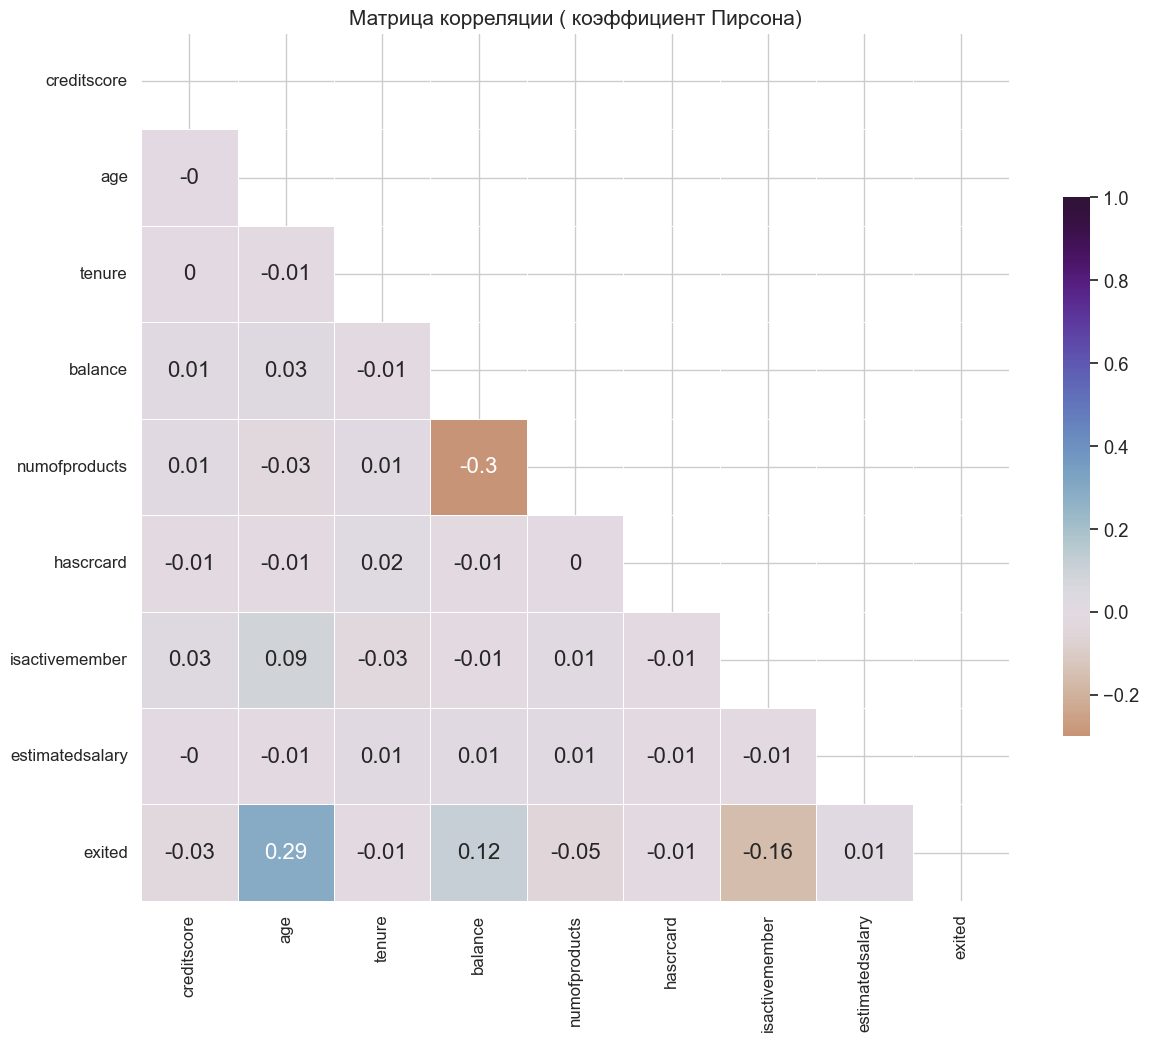

In [90]:
# Посмотрим на корреляции всех признаков
df_corr = df.drop(['geography', 'gender'], axis=1)
f, ax = plt.subplots(figsize=(14,14))
mat = df_corr.corr('pearson').round(2)
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(15, 15, as_cmap=True) 
sns.set(font_scale=1.2) 
sns.heatmap(mat, mask=mask, cmap= "twilight_shifted_r", linecolor = "white", vmax=1, center=0, annot = True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 16}) 
plt.title('Матрица корреляции ( коэффициент Пирсона)', size=15)
plt.show()

##### Корреляция у признаков слабая. Наибольшая корреляция наблюдается с признаком Age(0.29) и Balance(0.12). 

In [91]:
# Подготовим модель с использованием прямого кодирования(ohe для логистической регрессии) и порядкового кодирования(oe для деревьев). В нашей выборке есть 2 категориальных признака:
df['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [92]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [93]:
# Признак gender можно сразу закодировать в основной выборке, т.к. там только 2 значения
df.loc[:, 'gender'] = (df.gender == 'Male').astype(int)
df['gender'].unique()

array([0, 1], dtype=object)

In [94]:
# Закодируем отдельную таблицу OneHotEncoder из столбца geography
ohe = OneHotEncoder()
geography_ohe = ohe.fit_transform(df[['geography']]).toarray()
geography_ohe = pd.DataFrame(geography_ohe, columns=ohe.categories_[0])
geography_ohe.head()

,France,Germany,Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [95]:
# Закодируем таблицу geography, используя OrdinalEncoder
oe = OrdinalEncoder()
geography_oe = oe.fit_transform(df[['geography']])
geography_oe = pd.DataFrame(geography_oe, columns=['geography'])
geography_oe.head()

,geography
0,0.0
1,2.0
2,0.0
3,0.0
4,2.0


In [96]:
# Первоначальный столбец geography нам больше не нужен, т.к. это тип данных object, а его модели не воспринимают. Заменим его на закодированный столбец из OrdinalEncoder, и при необходимости, будем его исключать из обучения моделей

df.loc[:, 'geography'] = geography_oe.loc[:, 'geography']
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,0.0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2.0,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0.0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0.0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2.0,0,43,2,125510.82,1,1,1,79084.10,0


In [97]:
# Присоеденим к основной таблице закодированную таблицу с помощью OneHotEncoder:

df = df.join(geography_ohe)
df.columns = df.columns.str.lower()
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,france,germany,spain
0,619,0.0,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,2.0,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0.0,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0.0,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,2.0,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
 11  france           10000 non-null  float64
 12  germany          10000 non-null  float64
 13  spain            10000 non-null  float64
dtypes: float64(5), int64(7), object(2)
memory usage: 1.1+ MB


<Axes: >

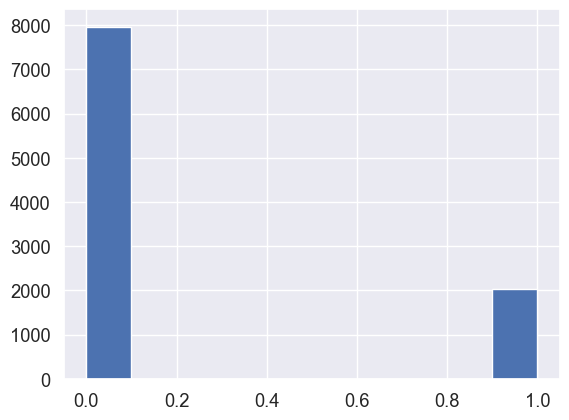

In [99]:
# Посмотрим на баланс целевого признака
df.exited.hist()

In [66]:
# С балансом наблюдаются проблемы.

# Исследование задачи



##### В нашем датасете 10000 объектов, 13 признаков ('CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'), 1 целевой признак ('Exited'). Признаки имеют тип float64(3), int64(7), object(3), целевой признак- int64. Так как предобработка данных уже проведена, пропуски и дубликаты в данных отсутствуют.

In [ ]:
# Разделим выборку на train, valid и test


features = df.drop(['exited'], axis=1)
target = df['exited']

# Разделение на тренировочную и временную (валидационная + тестовая) выборки
features_train, features_valid_test, target_train, target_valid_test =  train_test_split(features, target,
                                                                           test_size=0.2, random_state=12345,
                                                                           stratify=target)

features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test,
                                                               test_size=0.5, random_state=12345,
                                                               stratify=target_valid_test)
